# Clinton Full Demo

In [1]:
import pipenetgen as png
import osmnx as ox
import networkx as nx
import pandas as pd
import shapely

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
                # max and min pressure
parameters = {"MinP": 20, # m
              "MaxP":56, # m
              # base demand
              "demand":0.02, # Lps average demand
              "elev_mult": 1, # elevation multiplier
              # Diam and costs
              "diameters":[0.1016, 0.2032, 0.3048, 0.4064, 0.6], # m
              "cost":[200,219,300,400, 634], # $/m
              # default velocity
              "velocity":1, # m/s
              # Max and min flow
              "QMAX":40, # LPS, must be more than max flow reservoir provides
              "QMIN":0.1, # LPS
              # TOPO
              "link_density":0.0008,  #0.0008
              "node_degree":2, # 2
              "meshedness":0.1, #0.04
              # BIG M
              "BigM_P":200,
              "BigM_Q":41,
              # Pipe roughness
              "C":120, # Roughness Coeff
              # MILP params
              "Gap%":.1,
              "TimeLimit":600,
              "MIPFocus":1,
              "verbose":True,
              # Special features
              "min_velo":1,
              'all_edges':True,
              "max_head":85
              }

# Load Network

In [3]:
# Load polygon
coords = pd.read_csv("Input/ClintonCoords.csv")
poly = shapely.geometry.Polygon(coords[['x','y']])

In [4]:
# Create Graph
G = ox.graph_from_polygon(poly)

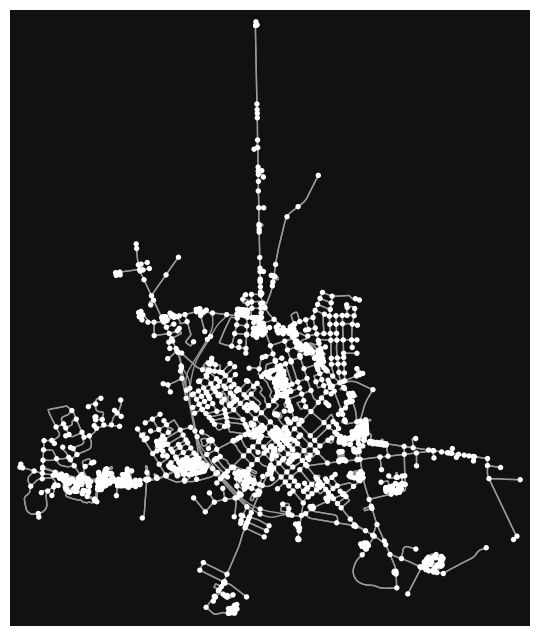

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(G)

# Add Sources

In [6]:
png.add_sources_from_csv(G,"Input/Clinton_sources.csv")

In [7]:
# png.add_tanks_from_csv(G,filename="Input/clinton_water_towers.csv")

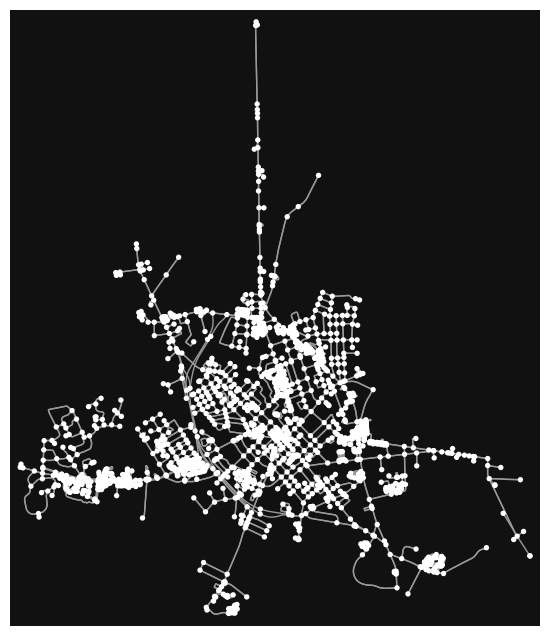

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
ox.plot_graph(G)

# Simplify

In [9]:
G = nx.convert_node_labels_to_integers(G)


removing 17
Removing 2361 excess Edges
Reservoir
Added 12B as 1737
Reservoir
Added 16 as 1739
Reservoir
Added 17 as 1740
Reservoir
Added 18 as 1741
Reservoir
Added 18S as 1742
Reservoir
Added 21D as 1743
Reservoir
Added 21S as 1744
Removing 170 nodes
Removing 22 nodes
Removing 5 nodes
Removing 3 nodes
Removing 2 nodes
Removing 0 nodes
Removing 51 excess Edges
87


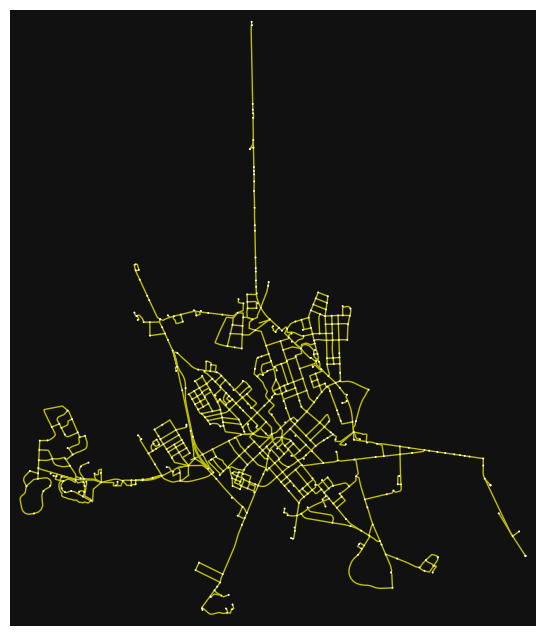

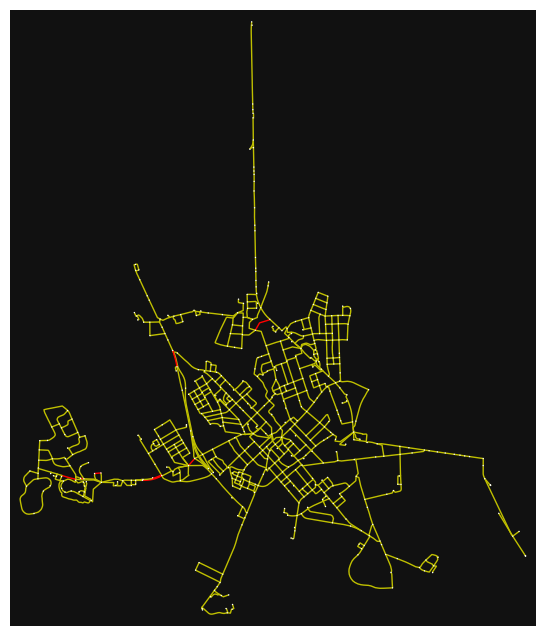

In [10]:
G_simple = png.fix_topo(G,show=True,consolidate_dist=25)

In [11]:
print(len(nx.get_node_attributes(G_simple,"special")))

10


# Add Elevation

In [12]:
png.assign_meteo_elevation(G_simple,grp_size=10)

## Plot

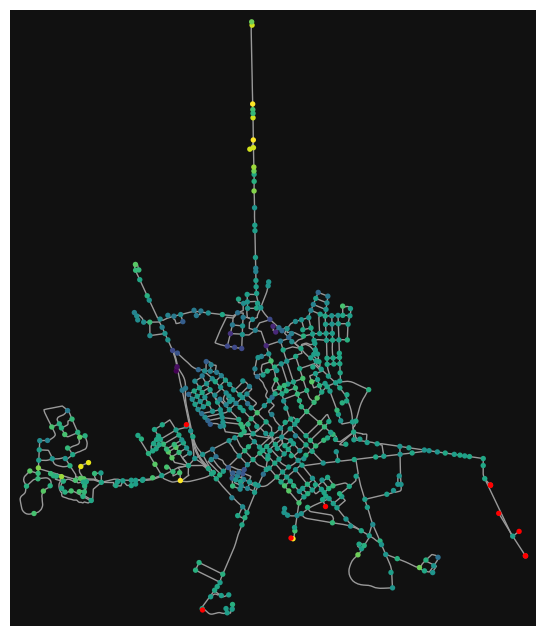

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [13]:
colors = ox.plot.get_node_colors_by_attr(G_simple,'elevation')
for node in nx.get_node_attributes(G_simple,'special'):
    colors[node] = 'red'

ox.plot_graph(G_simple,node_color=colors) # Where red are sources

# Add Demands

In [14]:
png.add_demands(G_simple,parameters['demand'])

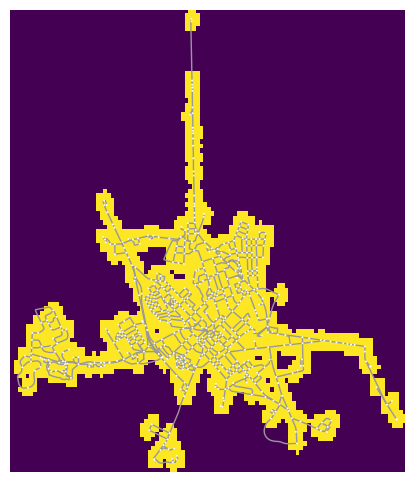

In [15]:
png.assign_LCZ_to_G(G_simple,"Input\Clinton_lcz.tif",6)

# Continue

In [16]:
for node in G_simple.nodes:
    if G_simple.nodes[node].get('demand'):
        if G_simple.nodes[node]['demand'] <= 0.002 and G_simple.nodes[node]['demand'] >= -0.0001:
            G_simple.nodes[node]['demand'] = 0.002
    else:
        G_simple.nodes[node]['demand']= 0.002
    G_simple.nodes[node]['demand'] *= 3 # peaking factor

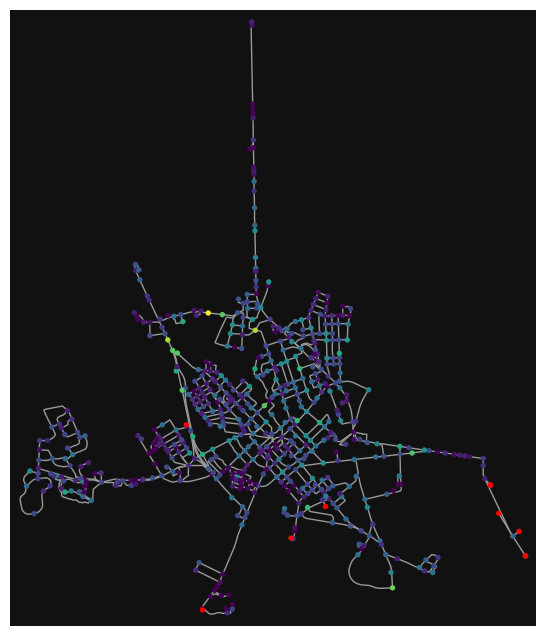

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
colors = ox.plot.get_node_colors_by_attr(G_simple,'demand')
for node in nx.get_node_attributes(G_simple,'special'):
    colors[node] = 'red'

ox.plot_graph(G_simple,node_color=colors) # Where red are sources

In [18]:
png.redistribute_demands(G_simple)

8778.691361477831
[<matplotlib.lines.Line2D object at 0x0000021EE38D7B20>, <matplotlib.lines.Line2D object at 0x0000021EE6115490>, <matplotlib.lines.Line2D object at 0x0000021EE61155B0>, <matplotlib.lines.Line2D object at 0x0000021EE6C370D0>, <matplotlib.lines.Line2D object at 0x0000021EE61156A0>, <matplotlib.lines.Line2D object at 0x0000021EE98E3C70>, <matplotlib.lines.Line2D object at 0x0000021EE5DC79A0>, <matplotlib.lines.Line2D object at 0x0000021EE5DDACD0>, <matplotlib.lines.Line2D object at 0x0000021EE5DDAEB0>, <matplotlib.lines.Line2D object at 0x0000021EE5DDA4F0>]


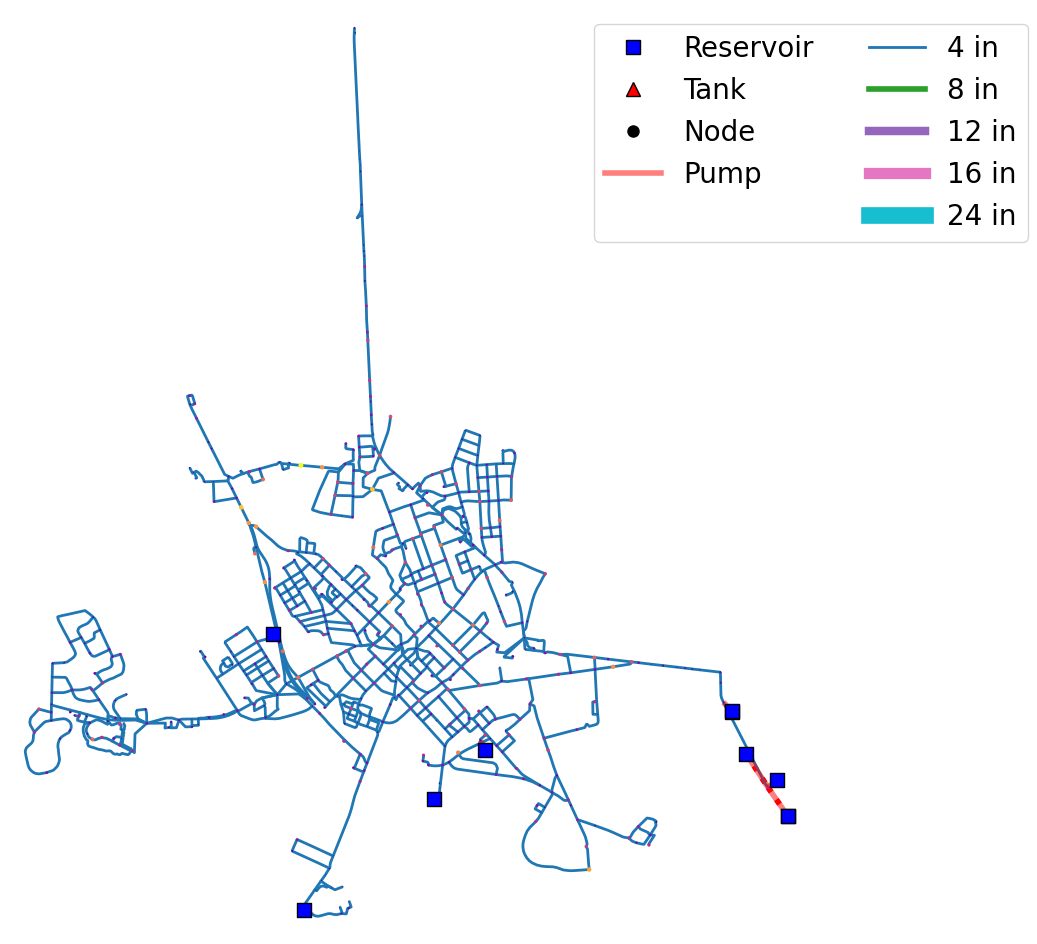

In [19]:
for edge in G_simple.edges:
    
    G_simple.edges[edge]['diameter'] = 0.1
png.pretty_plot(G_simple,node_color='demand')

In [20]:
for edge in G_simple.edges:
    G_simple.edges[edge]['diameter'] = 0.1016

G_simple.graph['max_head'] = parameters['max_head']

# png.G_to_inp(G_simple,"Output/Clinton_before_clsuter.inp")

In [21]:
png.get_total_node_demands(G_simple), png.get_total_demands(G_simple)

(18.286653951603267, 0.0)

In [22]:
sum(nx.get_node_attributes(G_simple,'demand').values())

0.0

# Cluster

In [23]:
png.get_minimum_negative_demand(G_simple)

-2.733136264844276

In [24]:
parameters['QMAX'] = 100

parameters['BigM_Q'] = 101

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


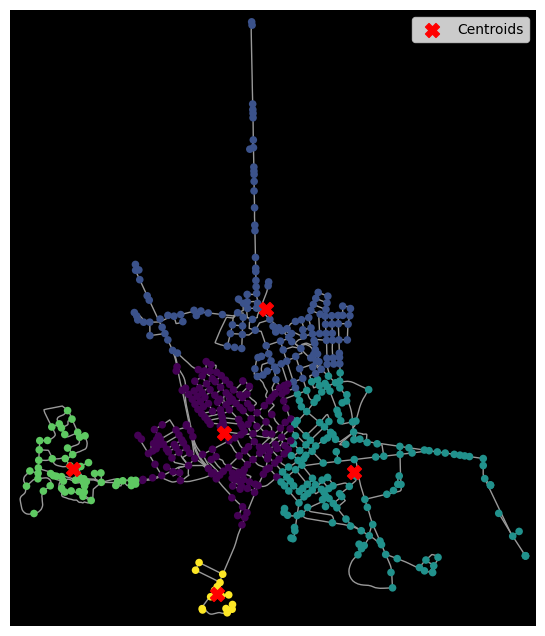

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


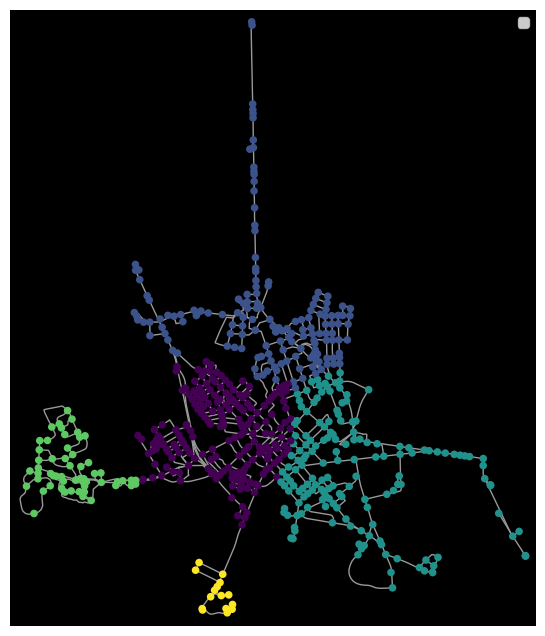

Subgraph 0


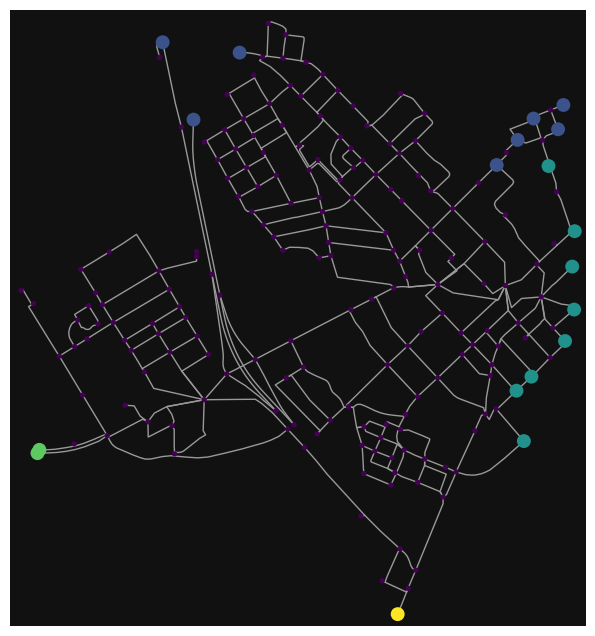

Subgraph 1


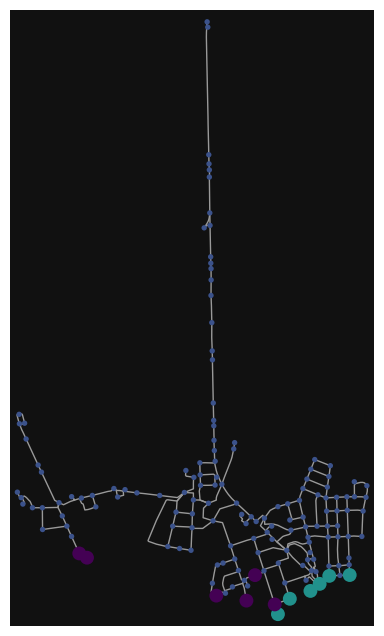

Subgraph 2


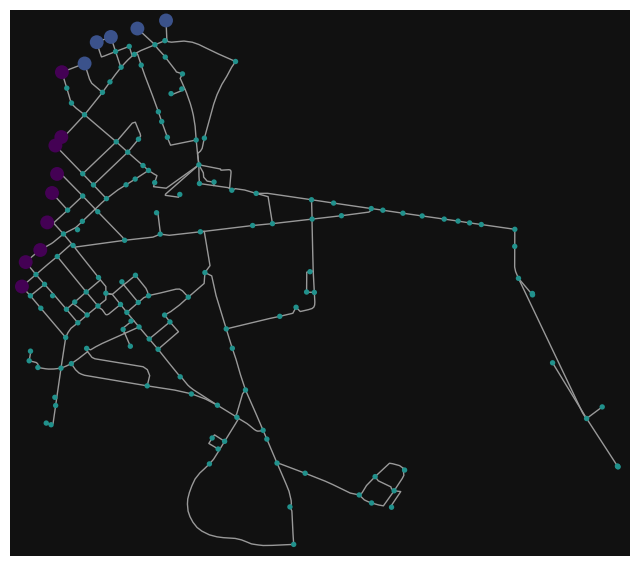

Subgraph 3


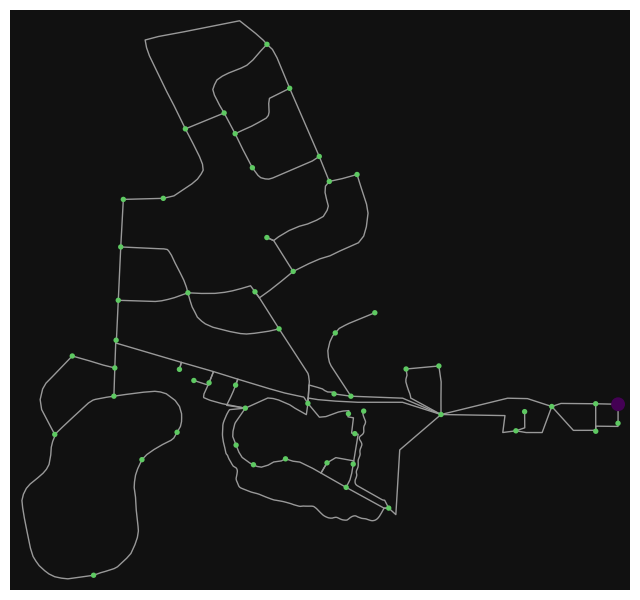

Subgraph 4


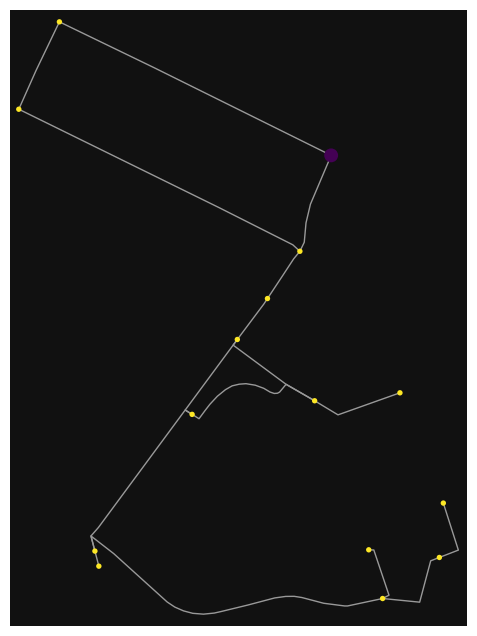

Clusters Are Connected True


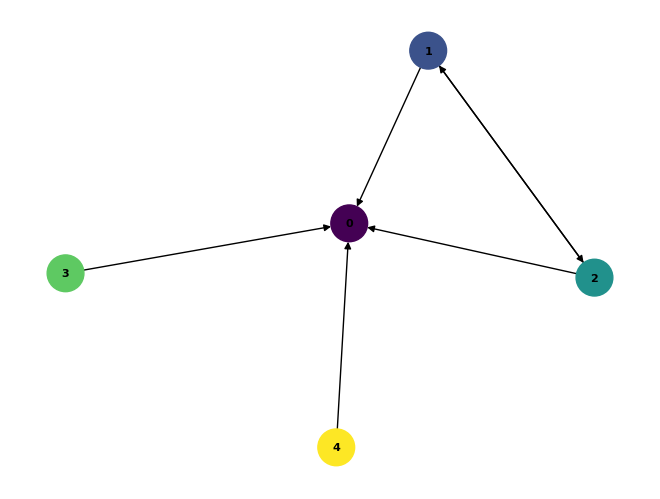

Demand Check
	Total demand: 0.0
Set parameter Username
Academic license - for non-commercial use only - expires 2026-07-07
Network Statistics
	Nodes: 5   Edges: 10
Ready
Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 203 rows, 130 columns and 1088 nonzeros
Model fingerprint: 0x8c61ef78
Variable types: 70 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [3e-05, 2e+02]
  Objective range  [4e+00, 2e+01]
  Bounds range     [6e-01, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 133 rows and 63 columns
Presolve time: 0.02s
Presolved: 70 rows, 67 columns, 401 nonzeros
Variable types: 21 continuous, 46 integer (46 binary)
Found heuristi

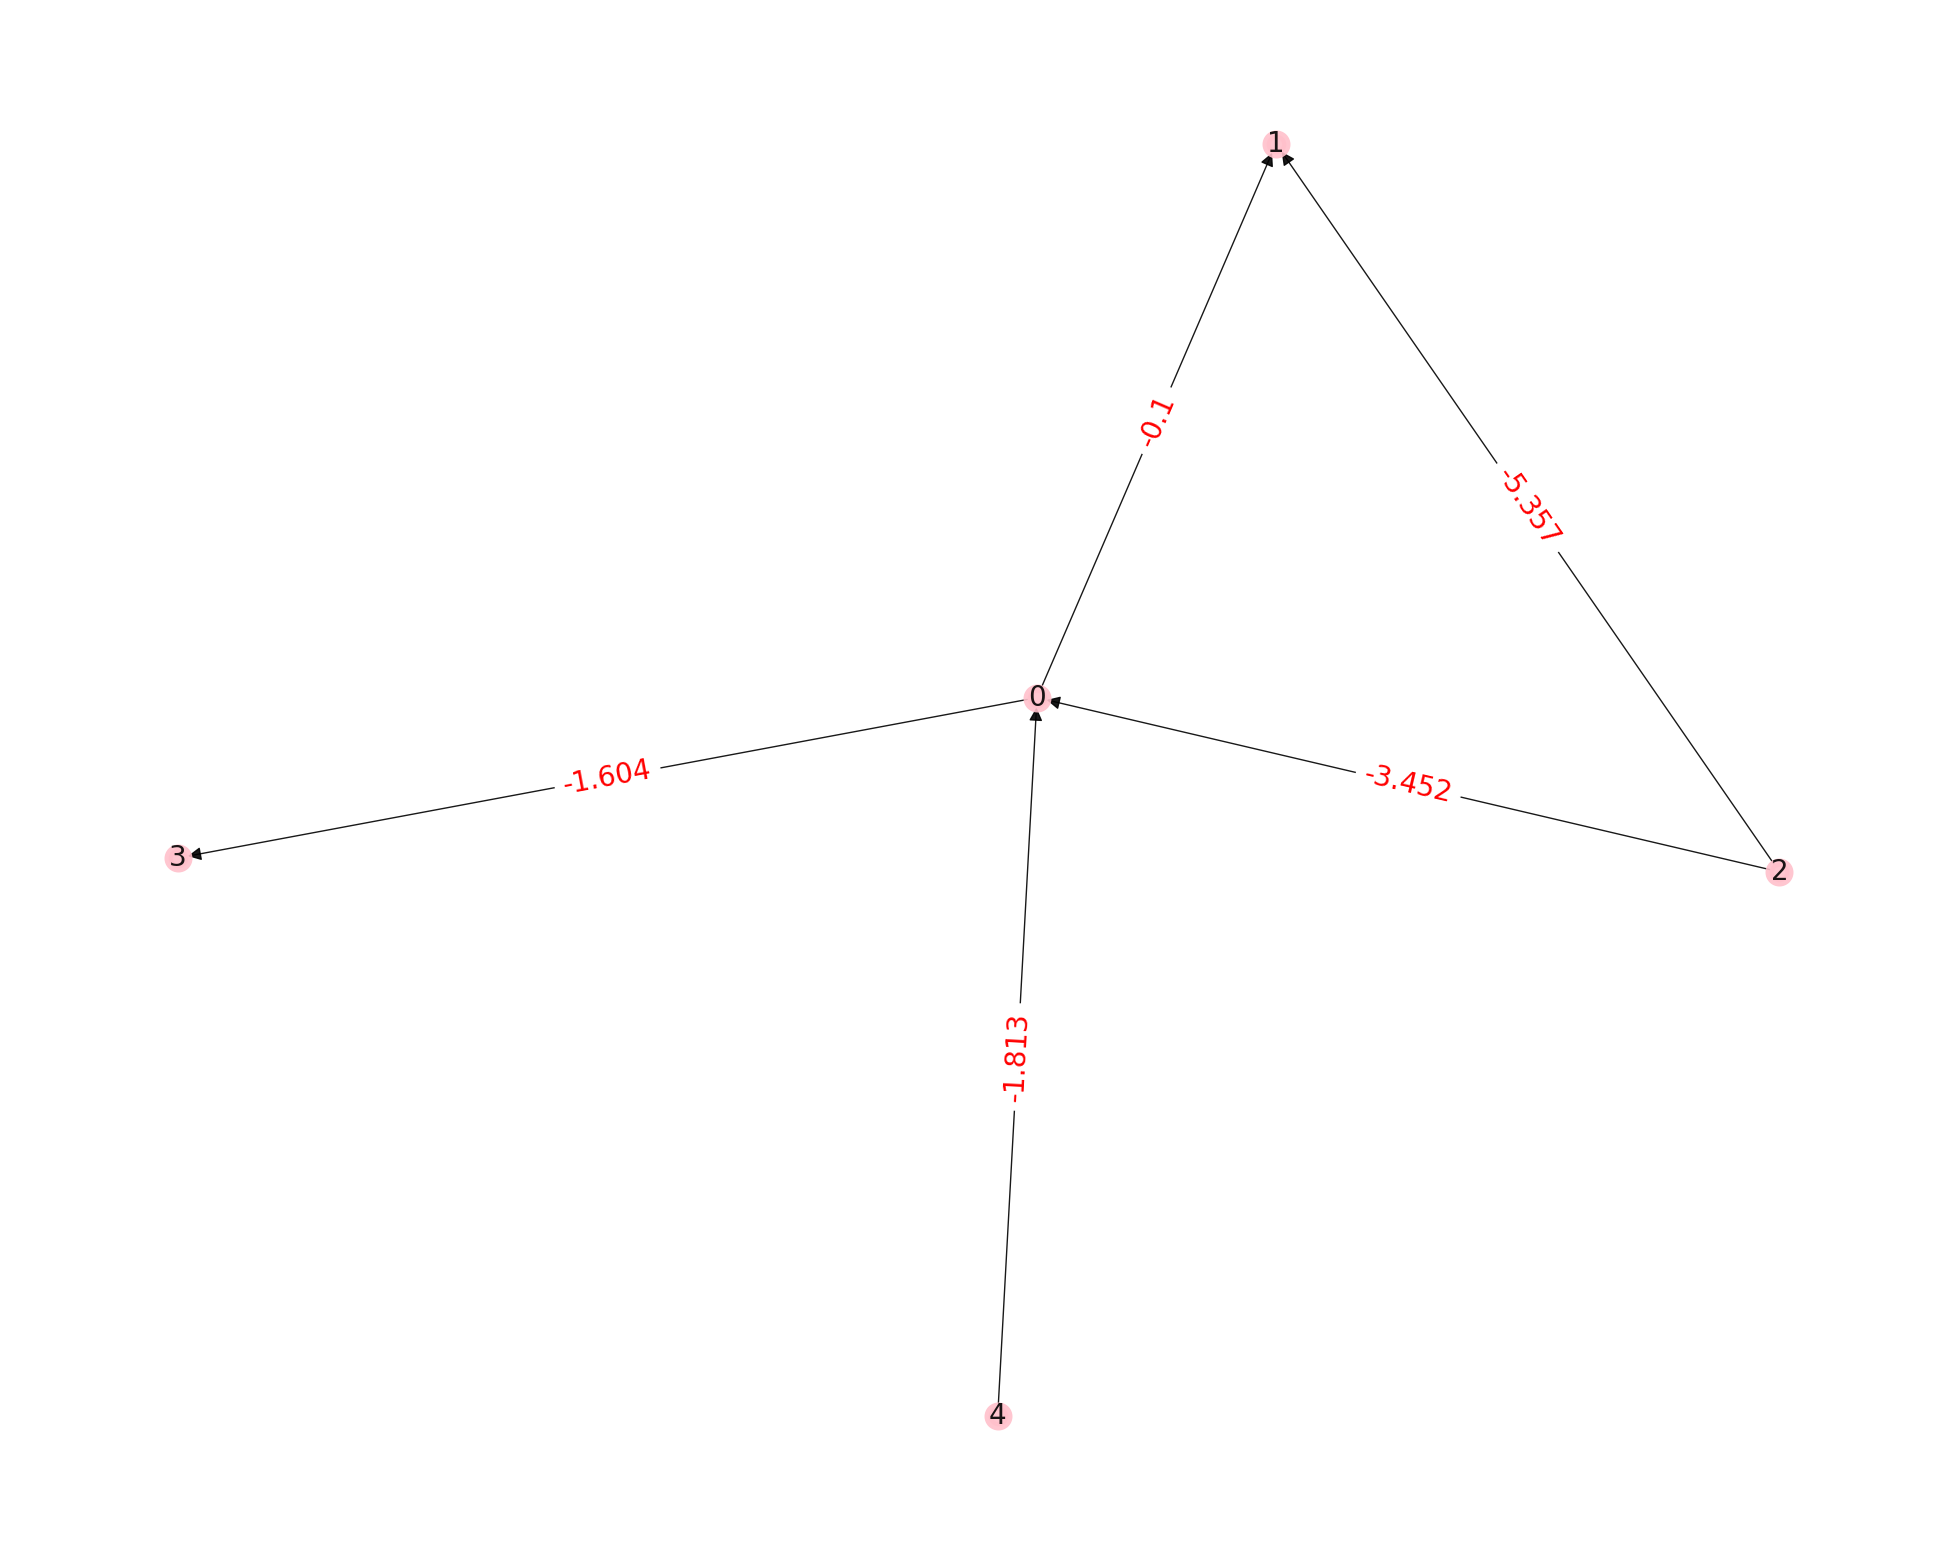

{0: {1: -0.1, 3: -1.603967, 2: 3.45167, 4: 1.813237}, 1: {0: 0.1, 2: 5.356949}, 3: {0: 1.603967}, 2: {0: -3.45167, 1: -5.356949}, 4: {0: -1.813237}} [2, 4, 0, 1, 3]
{'link_density': 0.016639828234031134, 'node_degree': 2.6790123456790123, 'meshedness': 0.1755485893416928}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.0166 2.679 0.1755


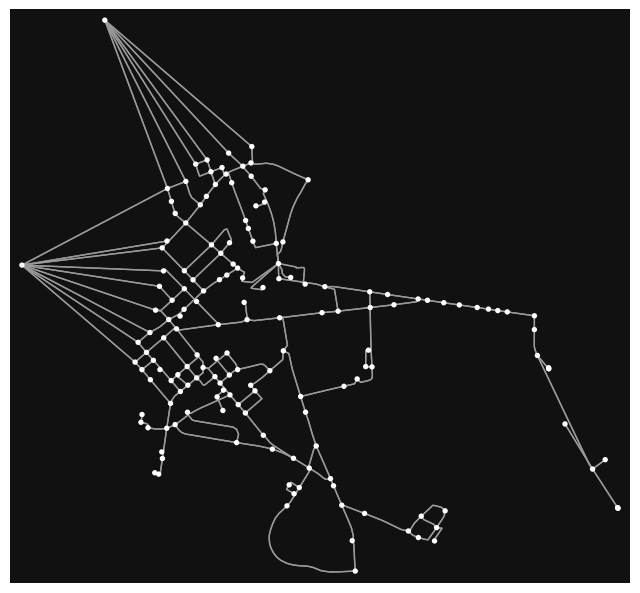

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 162   Edges: 434
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8772 rows, 5535 columns and 53955 nonzeros
Model fingerprint: 0x2a2c5399
Variable types: 2931 continuous, 2604 integer (2604 binary)
Coefficient statistics:
  Matrix range     [8e-05, 1e+03]
  Objective range  [8e+02, 7e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 1e+03]
Presolve removed 4861 rows and 2313 columns
Presolve time: 0.10s
Presolved: 3911 rows, 3222 columns, 25054 nonzeros
Variable types: 1002 continuous, 2220 integer (2220 binary)

Root relaxation: objective 7.861339e+06, 4031 iterations, 0.12 seconds (0.1

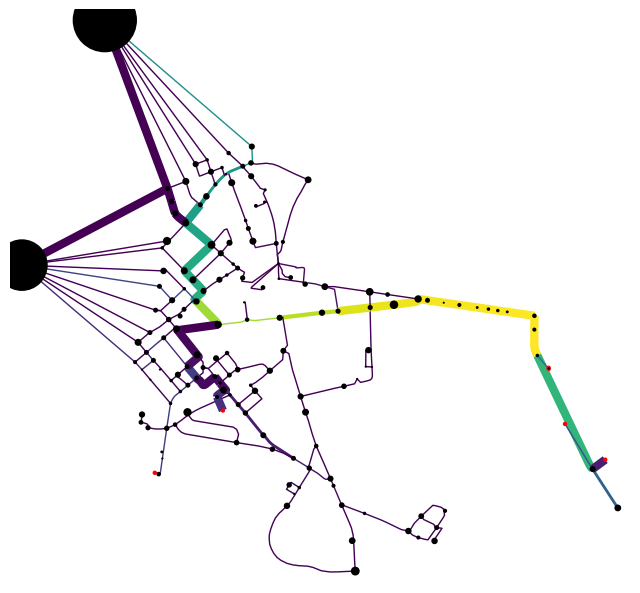

{'link_density': 0.14166666666666666, 'node_degree': 2.125, 'meshedness': 0.07407407407407407}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.1416 2.125 0.074


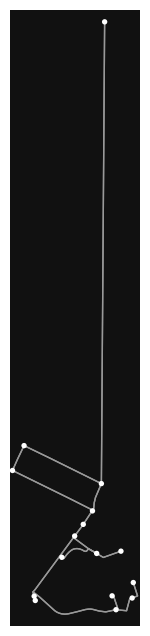

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 16   Edges: 34
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 699 rows, 443 columns and 3911 nonzeros
Model fingerprint: 0x41207849
Variable types: 239 continuous, 204 integer (204 binary)
Coefficient statistics:
  Matrix range     [8e-03, 1e+03]
  Objective range  [2e+03, 3e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 1e+03]
Presolve removed 591 rows and 335 columns
Presolve time: 0.00s
Presolved: 108 rows, 108 columns, 651 nonzeros
Variable types: 35 continuous, 73 integer (73 binary)
Found heuristic solution: objective 1346098.7979
Found heuristic solution: objective 1254691.235

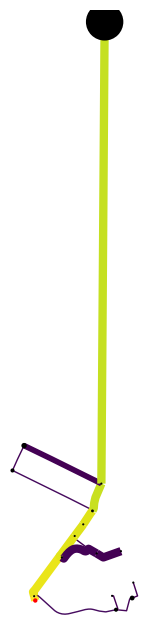

{'link_density': 0.015894990514279856, 'node_degree': 3.1313131313131315, 'meshedness': 0.289002557544757}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.0158 3.1313 0.289


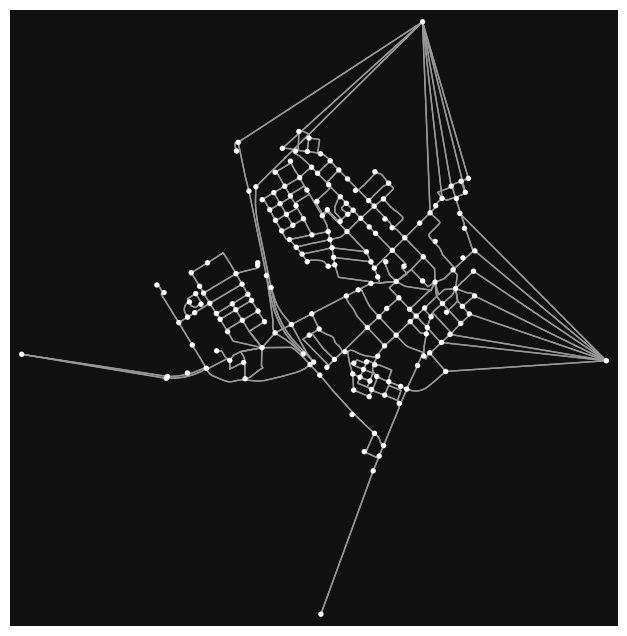

Demand Check
	Total demand: 0.0
Network Statistics
	Nodes: 198   Edges: 620
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12475 rows, 7839 columns and 80939 nonzeros
Model fingerprint: 0xa4089597
Variable types: 4119 continuous, 3720 integer (3720 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+03]
  Objective range  [3e-01, 5e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 1e+03]
Presolve removed 6320 rows and 2857 columns
Presolve time: 0.15s
Presolved: 6155 rows, 4982 columns, 44402 nonzeros
Variable types: 1532 continuous, 3450 integer (3450 binary)

Root relaxation: objective 9.903505e+06, 4721 iterations, 0.12 seconds (0.1

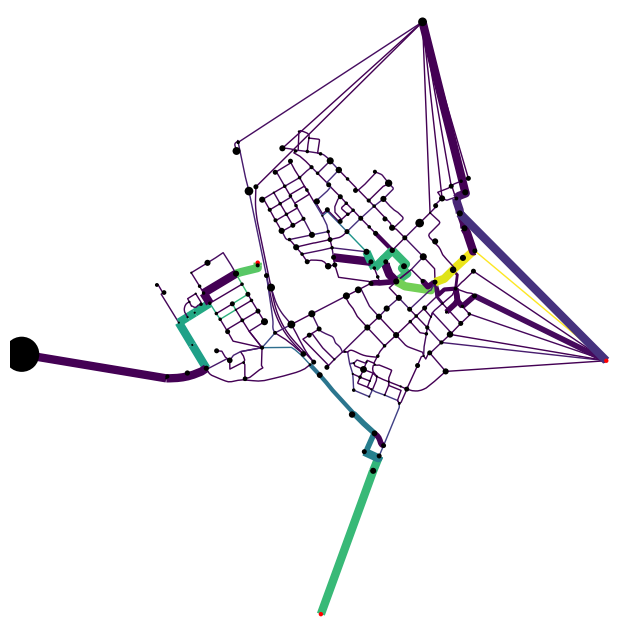

{'link_density': 0.018098031001256808, 'node_degree': 2.7870967741935484, 'meshedness': 0.20327868852459016}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.018 2.787 0.2032


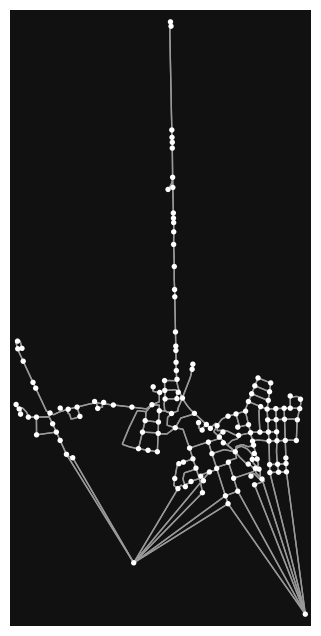

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 155   Edges: 432
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8703 rows, 5497 columns and 53096 nonzeros
Model fingerprint: 0x1e9fdbcf
Variable types: 2905 continuous, 2592 integer (2592 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+03]
  Objective range  [7e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 1e+03]
Presolve removed 4946 rows and 2390 columns
Presolve time: 0.15s
Presolved: 3757 rows, 3107 columns, 25054 nonzeros
Variable types: 955 continuous, 2152 integer (2152 binary)

Root relaxation: objective 7.001184e+06, 3520 iterations, 0.08 seconds (0.07

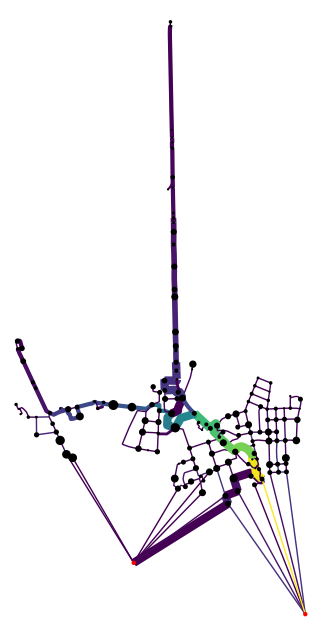

{'link_density': 0.04824561403508772, 'node_degree': 2.7017543859649122, 'meshedness': 0.1926605504587156}
{'link_density': 100, 'node_degree': 100, 'meshedness': 100}
0.0482 2.7017 0.1926


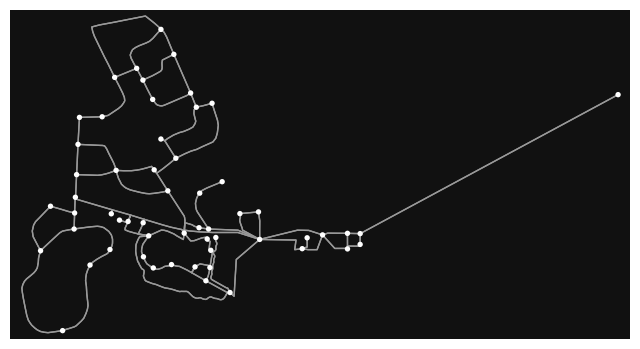

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 57   Edges: 154
Ready
Set parameter MIPGap to value 0.24
Set parameter TimeLimit to value 600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3120 rows, 1965 columns and 19305 nonzeros
Model fingerprint: 0x878f85cd
Variable types: 1041 continuous, 924 integer (924 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+03]
  Objective range  [1e-01, 5e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 1e+03]
Presolve removed 1539 rows and 674 columns
Presolve time: 0.05s
Presolved: 1581 rows, 1291 columns, 10591 nonzeros
Variable types: 420 continuous, 871 integer (871 binary)

Root relaxation: objective 3.163941e+06, 624 iterations, 0.00 seconds (0.01 work u

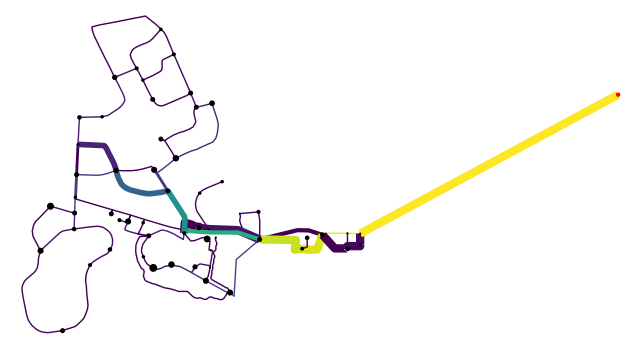

(37, 73)
(81, 83)
(86, 36)
(100, 210)
(617, 99)
(680, 210)
(193, 194)
(265, 457)
(324, 457)
(351, 739)
(360, 361)
(360, 362)
(373, 76)
(424, 483)
(490, 74)
(415, 242)
(522, 124)
(46, 45)
(601, 672)
(613, 660)
(125, 123)
(661, 660)
(683, 362)
(231, 124)
(419, 672)
(453, 363)
(453, 343)
(424, 430)


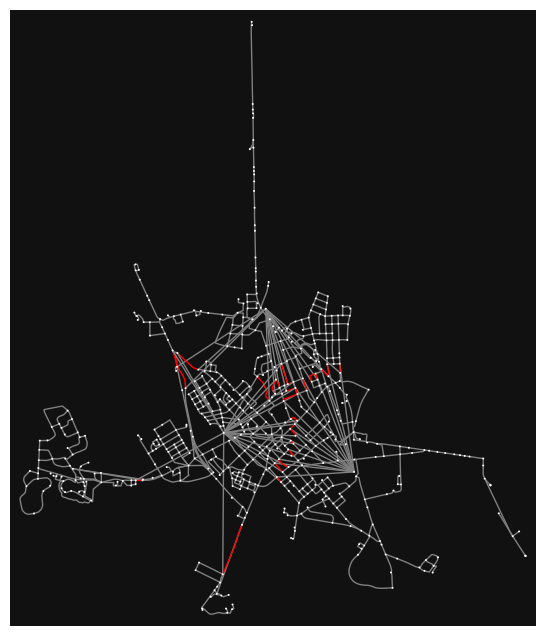

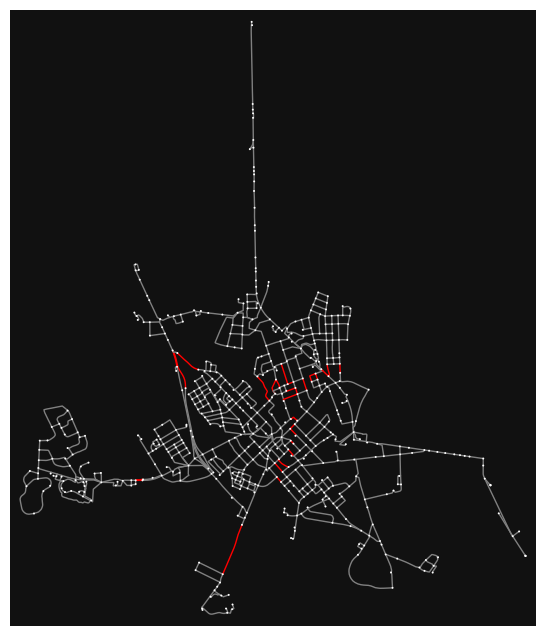

In [25]:
cluster_params = {"QMIN":0,"QMAX":1000,"BigM_Q":1001,"Gap%":0.24,"min_velo":1,"all_edges": False, "verbose": True,"max_head":100}
base = png.run_cluster_algorithm(G_simple,5,parameters,show=True,cluster_params=cluster_params)

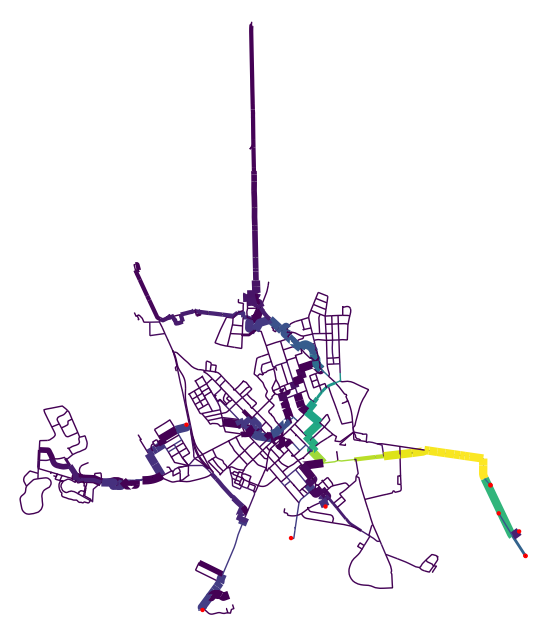

In [26]:
png.plot_network(base,"diameter",'flowrate')

In [27]:
for edge in nx.get_edge_attributes(base,'special').keys():
    if base.nodes[edge[0]].get('special') or base.nodes[edge[1]].get('special'):
        pass
    else:
        print(edge)
        del base.edges[edge]['pump']
        del base.edges[edge]['pumphead']
        del base.edges[edge]['special']

(769, 40, 0)
(770, 93, 0)


In [28]:
png.G_to_inp(base,"Output/Clinton_base.inp")

In [29]:
wn = png.G_to_wn(base)

# EPANET

In [30]:
epa_G = png.run_epanet_algorithm(base,parameters)

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


In [31]:
# png.G_to_inp(epa_G,'Output/Clinton_pump_test.inp')

# LP

In [32]:
parameters["QMIN"] = 0
parameters['Gap%'] = 0.01

In [33]:
errors = [png.calculate_pressure_dif(epa_G)]
costs = [png.calc_cost(G,parameters)]

In [34]:
parameters

{'MinP': 20,
 'MaxP': 56,
 'demand': 0.02,
 'elev_mult': 1,
 'diameters': [0.1016, 0.2032, 0.3048, 0.4064, 0.6],
 'cost': [200, 219, 300, 400, 634],
 'velocity': 1,
 'QMAX': 100,
 'QMIN': 0,
 'link_density': 0.0008,
 'node_degree': 2,
 'meshedness': 0.1,
 'BigM_P': 200,
 'BigM_Q': 101,
 'C': 120,
 'Gap%': 0.01,
 'TimeLimit': 600,
 'MIPFocus': 1,
 'verbose': True,
 'min_velo': 1,
 'all_edges': True,
 'max_head': 85}

In [35]:
parameters['QMAX'] = 35
parameters['BigM_Q'] = 36

In [36]:
parameters['TimeLimit'] = 60*60

In [37]:
epa_G2,errors,costs = png.run_a_run(epa_G,parameters,"Output/testing_hnt_clinton.hnt","Output/testing_hnt_clinton_1.hnt",errors,costs,True)

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 34562 rows, 20740 columns and 193210 nonzeros
Model fingerprint: 0x51a6bb94
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Presolve removed 18582 rows and 7784 columns
Presolve time: 0.33s
Presolved: 15980 rows, 12956 columns, 100725 nonzeros
Variable types: 3893 continuous, 9063 integer (9063 binary)
Deterministic 

8778.691361477831
[<matplotlib.lines.Line2D object at 0x0000021EE6265670>, <matplotlib.lines.Line2D object at 0x0000021EE3969EE0>, <matplotlib.lines.Line2D object at 0x0000021EE3969E20>, <matplotlib.lines.Line2D object at 0x0000021EE65B7CD0>, <matplotlib.lines.Line2D object at 0x0000021EE3969880>, <matplotlib.lines.Line2D object at 0x0000021EE65B7C70>, <matplotlib.lines.Line2D object at 0x0000021EE65B7160>, <matplotlib.lines.Line2D object at 0x0000021EE65B7640>, <matplotlib.lines.Line2D object at 0x0000021EE65B72B0>, <matplotlib.lines.Line2D object at 0x0000021EE65B7D30>]


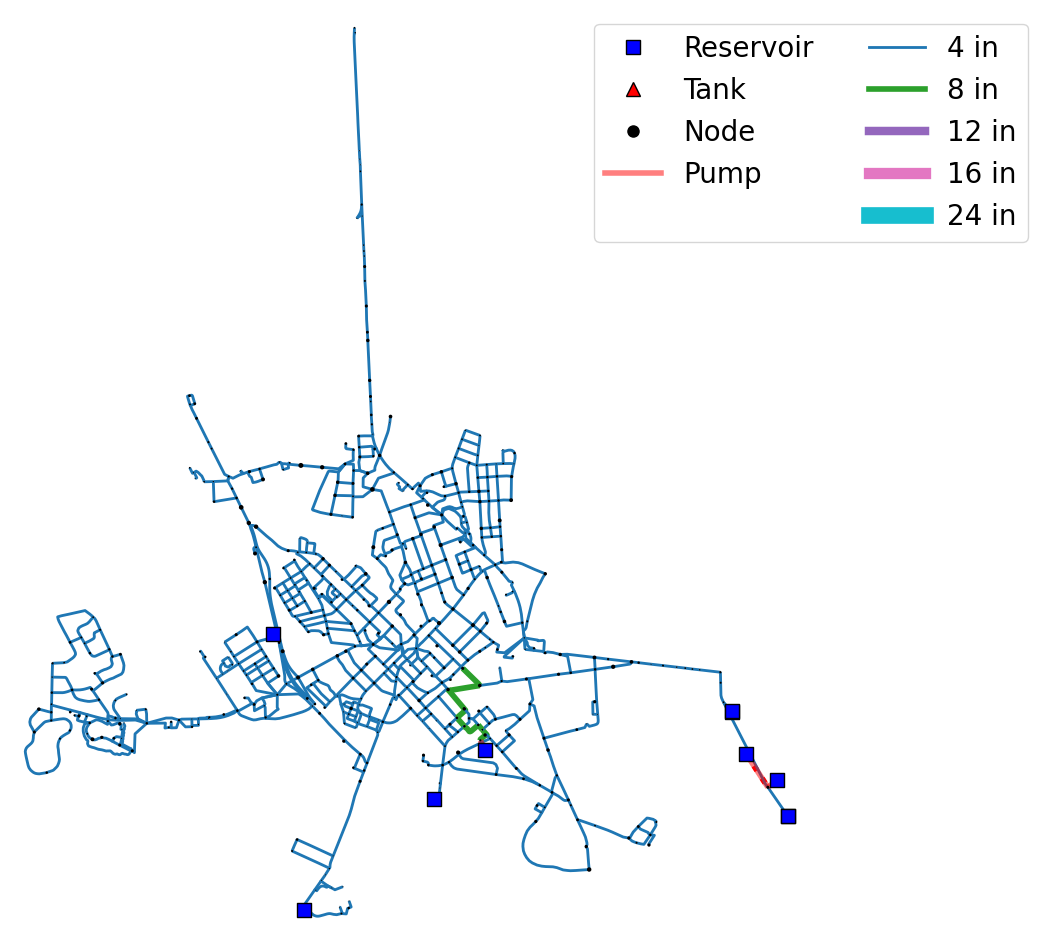

In [38]:
png.pretty_plot(epa_G2)

In [39]:
epa_G3,errors,costs = png.run_a_run(epa_G2,parameters,"Output/testing_hnt_clinton_1.hnt","Output/testing_hnt_clinton_2.hnt",errors,costs,False)

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read solution from file Output/testing_hnt_clinton_1.hnt.sol
Read MIP start from file Output/testing_hnt_clinton_1.hnt.mst
Read hints from file Output/testing_hnt_clinton_1.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 34562 rows, 20740 columns and 194278 nonzeros
Model fingerprint: 0x7f5425c7
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]

User MIP start did not produce a new incumbent solution

Presolve re

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


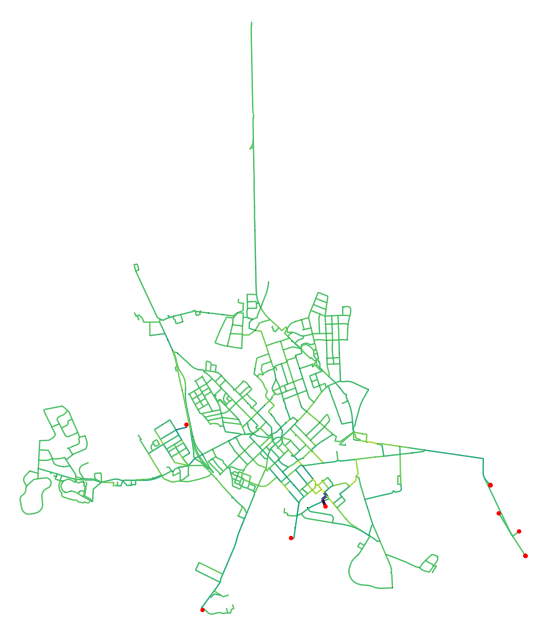

In [40]:
png.plot_network(epa_G3,"diameter","flowrate")

In [41]:
parameters['TimeLimit'] = 3600

In [42]:
epa_G4,errors,costs = png.run_a_run(epa_G3,parameters,"Output/testing_hnt_clinton_2.hnt","Output/testing_hnt_clinton_3.hnt",errors,costs,False)

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 34562 rows, 20740 columns and 194310 nonzeros
Model fingerprint: 0x9daa4d4e
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Presolve removed 18437 rows and 7637 columns
Presolve time: 0.38s
Presolved: 16125 rows, 13103 columns, 101987 nonzeros
Variable types: 4019 continuous, 9084 integer (9084 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Sho

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


In [43]:
epa_G5,errors,costs = png.run_a_run(epa_G4,parameters,"Output/testing_hnt_clinton_3.hnt","Output/testing_hnt_clinton_4.hnt",errors,costs,False)

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 34562 rows, 20740 columns and 194274 nonzeros
Model fingerprint: 0x4ea99706
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Presolve removed 18448 rows and 7648 columns
Presolve time: 0.39s
Presolved: 16114 rows, 13092 columns, 101925 nonzeros
Variable types: 4008 continuous, 9084 integer (9084 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Sho

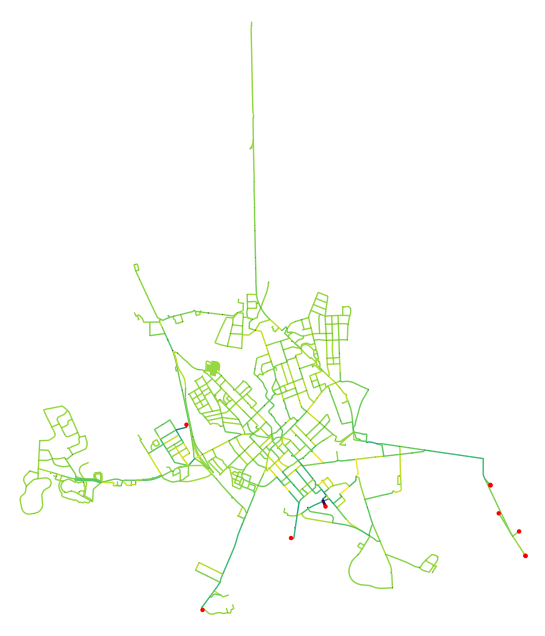

In [44]:
png.plot_network(epa_G5,"diameter",'flowrate')

In [45]:
import matplotlib.pyplot as plt

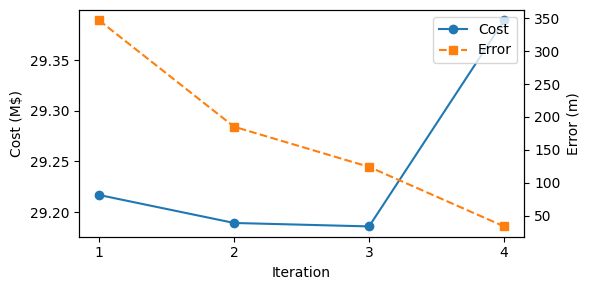

In [46]:
png.plot_error_cost(errors,costs)

# Fire Flow!

In [47]:
G = epa_G5.copy()

In [48]:

hydr_locations = list(png.find_hydrant_locations(G,11))
hydr_demand = 30 # LPS


In [49]:
hydr_locations

[512, 165, 646, 523, 557, 112, 152, 409, 62]

In [50]:
hydr_locations = png.sort_by_proximity_to_special(G.to_undirected(),hydr_locations)

In [51]:
hydr_locations

[557, 165, 512, 646, 152, 112, 409, 62, 523]

In [52]:
for node in G.nodes:
    G.nodes[node]['base_demand'] = G.nodes[node]['demand']

# G.nodes[hydr_locations[0]]['demand'] += hydr_demand

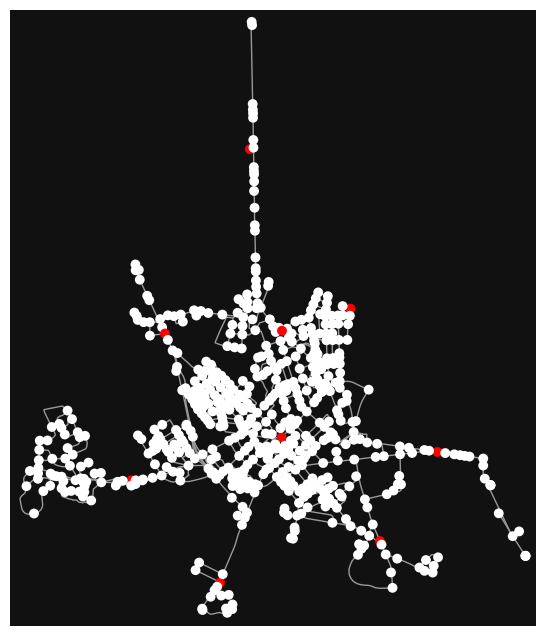

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [53]:
# Highlight hydrant locations
nc = ['r' if node in hydr_locations else "w" for node in epa_G.nodes]
ox.plot_graph(epa_G, node_color=nc, node_size=50, node_zorder=2, show=True)


In [54]:
epa_G_ff = png.run_epanet_algorithm(G,parameters)

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


In [55]:
png.G_to_inp(epa_G_ff,"Output/Clinton_base.inp")

In [56]:
parameters

{'MinP': 20,
 'MaxP': 56,
 'demand': 0.02,
 'elev_mult': 1,
 'diameters': [0.1016, 0.2032, 0.3048, 0.4064, 0.6],
 'cost': [200, 219, 300, 400, 634],
 'velocity': 1,
 'QMAX': 35,
 'QMIN': 0,
 'link_density': 0.0008,
 'node_degree': 2,
 'meshedness': 0.1,
 'BigM_P': 200,
 'BigM_Q': 36,
 'C': 120,
 'Gap%': 0.01,
 'TimeLimit': 3600,
 'MIPFocus': 1,
 'verbose': True,
 'min_velo': 1,
 'all_edges': True,
 'max_head': 85}

In [57]:
parameters['verbose'] = True
parameters['Gap%'] = 0.01
parameters['hydrant_demand'] = hydr_demand
parameters['TimeLimit'] = 60*60 # Increase this to reduce error

In [58]:
errors_ff = [png.calculate_pressure_dif(G)]
costs_ff = [png.calc_cost(G,parameters)]

Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_4.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 201158 nonzeros
Model fingerprint: 0x60bab5ec
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Presolve removed 20113 rows and 7674 columns
Presolve time: 0.42s
Presolved: 16081 rows, 13066 columns, 101627 nonzeros
Variable types: 4029 continuous, 9037 integer (9037 binary)
Deterministi

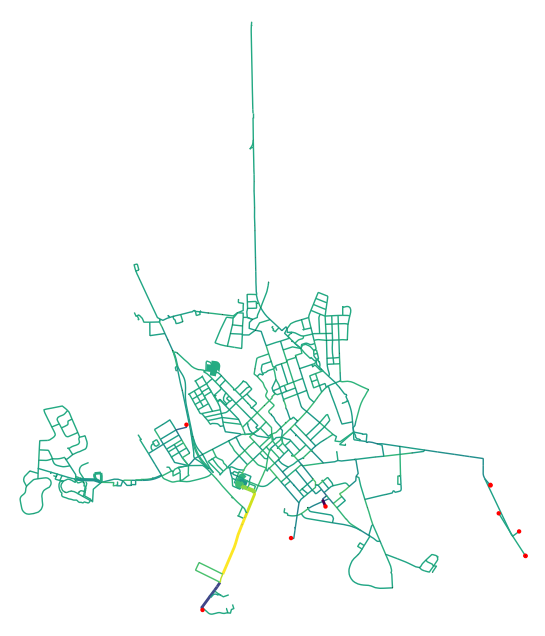

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 201192 nonzeros
Model fingerprint: 0xd1232380
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-05, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20199 rows and 7759 columns
Presolve time: 0.37s
Presolved: 15995 rows, 12981 columns, 100551 nonzeros
Variable types: 4004 continuous, 8977 integer (

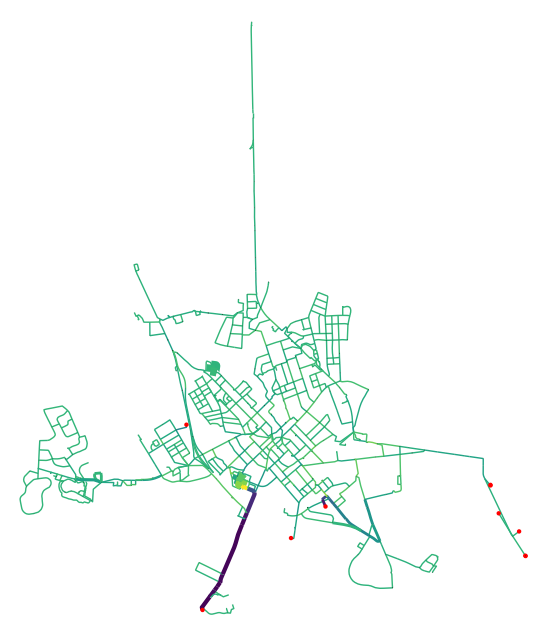

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 201608 nonzeros
Model fingerprint: 0x04bcaaf1
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20303 rows and 7879 columns
Presolve time: 0.40s
Presolved: 15891 rows, 12861 columns, 99786 nonzeros
Variable types: 4030 continuous, 8831 integer (8

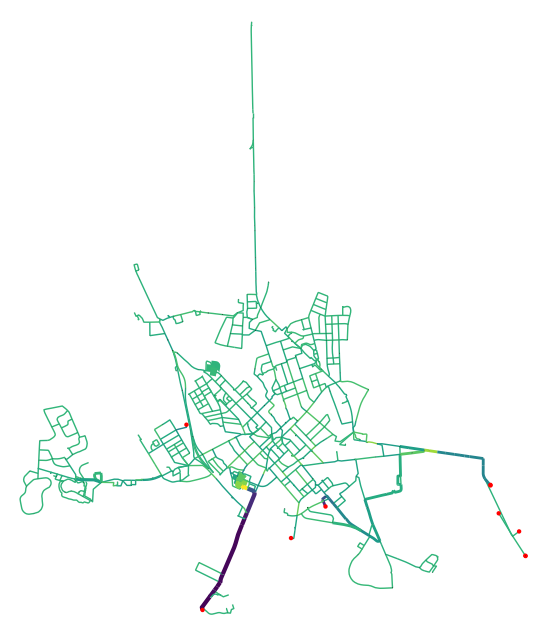

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 201918 nonzeros
Model fingerprint: 0x864b3280
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20287 rows and 7841 columns
Presolve time: 0.40s
Presolved: 15907 rows, 12899 columns, 99417 nonzeros
Variable types: 4044 continuous, 8855 integer (8

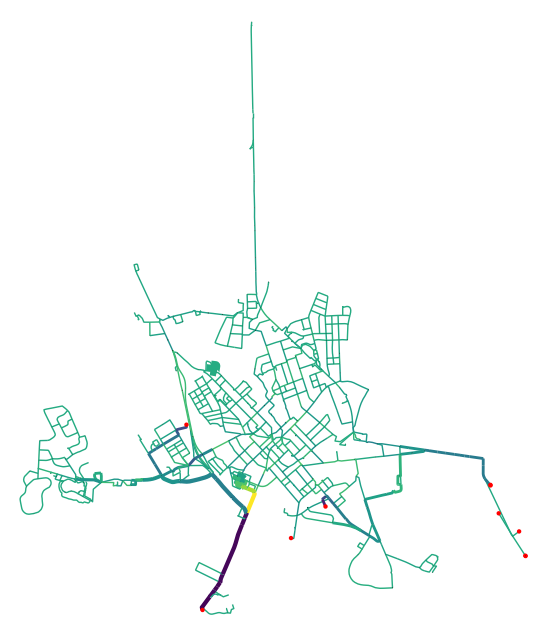

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 201360 nonzeros
Model fingerprint: 0x5555f1f4
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [2e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20349 rows and 7904 columns
Presolve time: 0.40s
Presolved: 15845 rows, 12836 columns, 98596 nonzeros
Variable types: 4010 continuous, 8826 integer (8

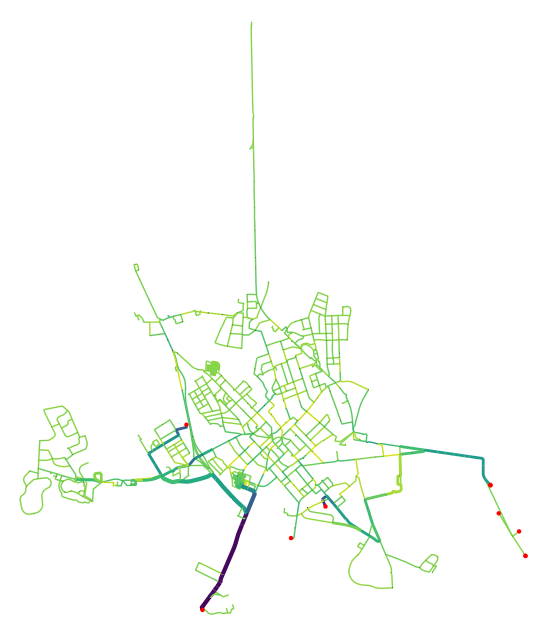

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 202312 nonzeros
Model fingerprint: 0xeea97541
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20316 rows and 7871 columns
Presolve time: 0.38s
Presolved: 15878 rows, 12869 columns, 99122 nonzeros
Variable types: 4064 continuous, 8805 integer (8

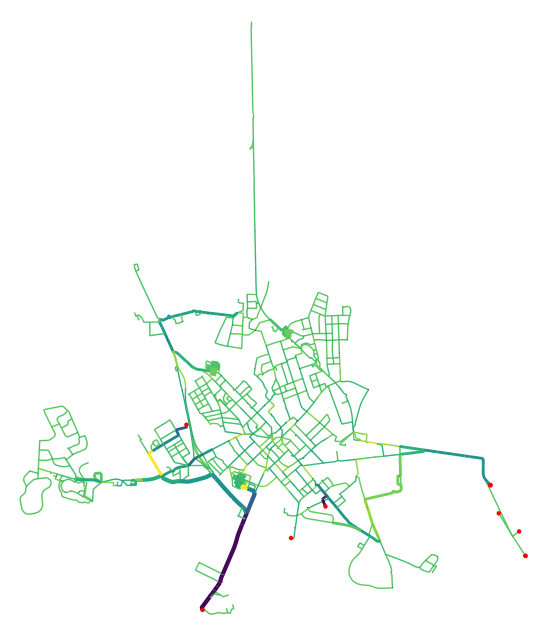

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 202396 nonzeros
Model fingerprint: 0x864887bc
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20357 rows and 7919 columns
Presolve time: 0.43s
Presolved: 15837 rows, 12821 columns, 98445 nonzeros
Variable types: 4062 continuous, 8759 integer (8

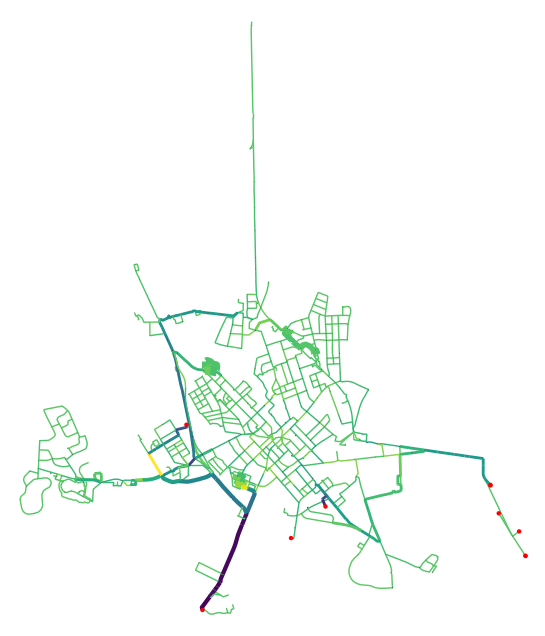

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


Demand Check
	Total demand: -0.0
Network Statistics
	Nodes: 578   Edges: 1632
Ready
Read hints from file Output/testing_hnt_clinton_fire.hnt
Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 3600
Set parameter MIPFocus to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36194 rows, 20740 columns and 202122 nonzeros
Model fingerprint: 0xc5758e0a
Variable types: 10948 continuous, 9792 integer (9792 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+02]
  Objective range  [1e-01, 8e+05]
  Bounds range     [6e-01, 1e+00]
  RHS range        [6e-03, 2e+02]
Using variable hints.
Presolve removed 20478 rows and 8030 columns
Presolve time: 0.36s
Presolved: 15716 rows, 12710 columns, 96844 nonzeros
Variable types: 4036 continuous, 8674 integer (8

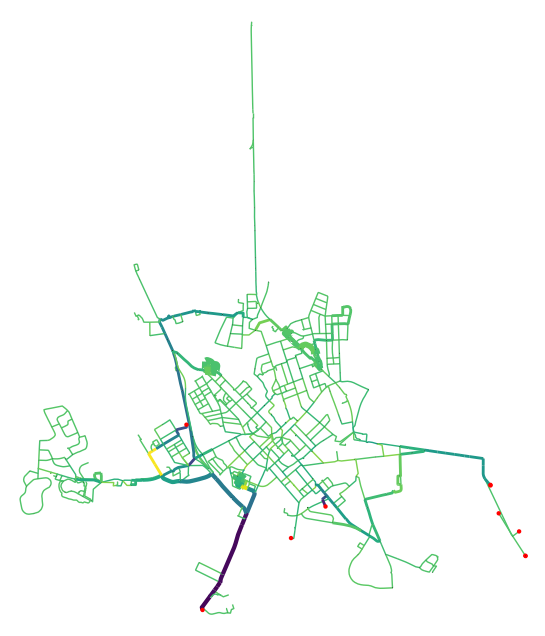

In [59]:
for i in range(len(hydr_locations)-1):
    if i == 0:
        hnt_path = "Output/testing_hnt_clinton_4.hnt"
        write = True
    else:
        hnt_path = "Output/testing_hnt_clinton_fire.hnt"
        write=False
    try:
        epa_G_ff,errors_ff,costs_ff = png.run_a_fire_flow(epa_G_ff,parameters,hydr_locations[i],hnt_path,"Output/testing_hnt_clinton_fire.hnt",errors_ff,costs_ff,write)
        png.plot_network(epa_G_ff,'diameter','flowrate')
    except:
        for node in hydr_locations:
            epa_G_ff.nodes[node]['demand'] = epa_G_ff.nodes[node]['base_demand']
        print("\n\n\n\n\n\nMODEL FAILED\n\n\n\n\n")

In [60]:
for node,dem in nx.get_node_attributes(epa_G_ff,'demand').items():
    if dem >= 30:
        print(node)
        epa_G_ff.nodes[node]['demand'] = epa_G.nodes[node]['base_demand']

# Showcase

In [61]:
png.set_reservoir_pressure_to_pump(epa_G_ff)
wn = png.G_to_wn(epa_G_ff)
final_G = png.transfer_flowrates(wn,epa_G_ff)

C:\Users\epzausch\AppData\Roaming\Python\Python39\site-packages\wntr\sim\models\constraint.py:724: UserWarning: Pump smoothing polynomial is not monotonically decreasing.
  warnings.warn('Pump smoothing polynomial is not monotonically decreasing.')


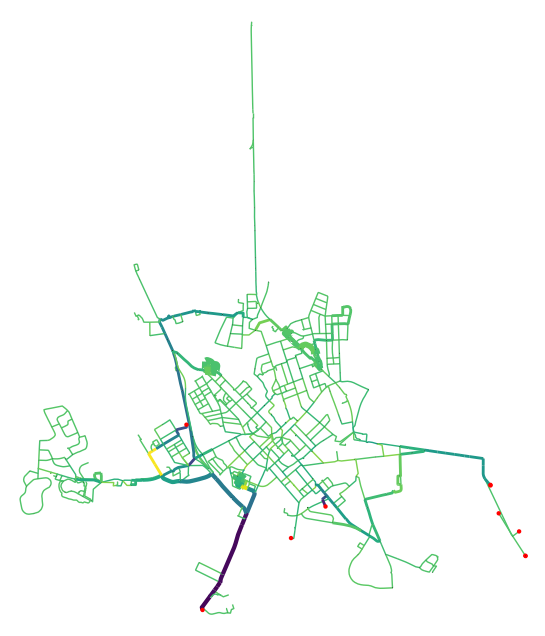

In [62]:
png.plot_network(final_G,'diameter','flowrate')

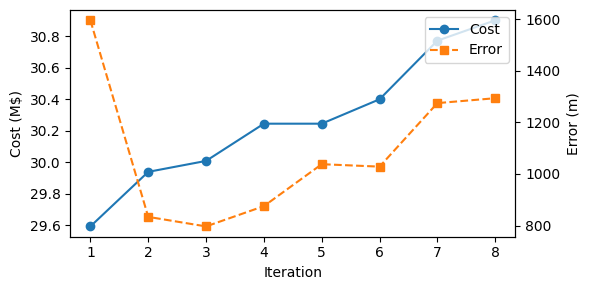

In [63]:
png.plot_error_cost(errors_ff,costs_ff)

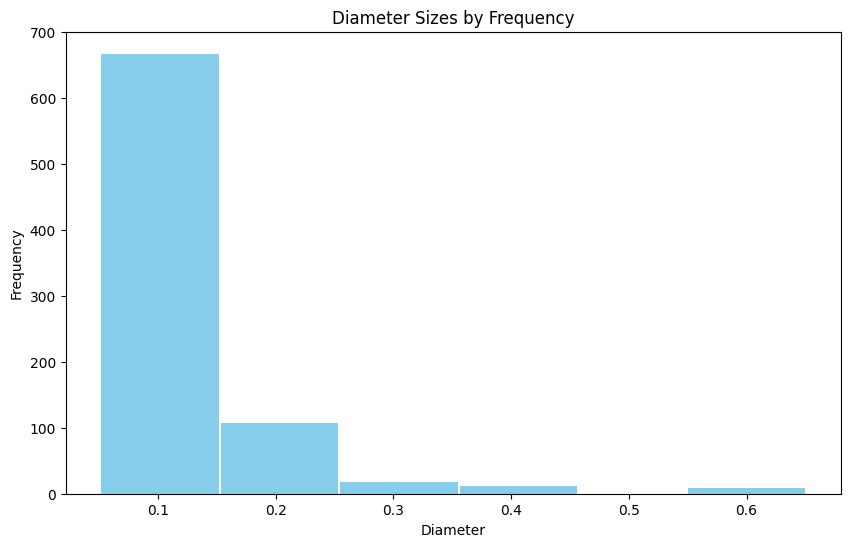

In [64]:
import matplotlib.pyplot as plt
from collections import Counter

values = list(nx.get_edge_attributes(final_G,'diameter').values())

value_counts = Counter(values)

sorted_values = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)

sorted_values_only = [item[0] for item in sorted_values]
sorted_frequencies = [item[1] for item in sorted_values]

plt.figure(figsize=(10, 6))
plt.bar(sorted_values_only, sorted_frequencies, color='skyblue',width=0.1)

plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Diameter Sizes by Frequency')

plt.show()

In [65]:
png.G_to_inp(final_G,"Output/Final_Clinton.inp")

In [66]:
png.G_to_osm(final_G,"Output/Final_Clinton.osm")